<a href="https://colab.research.google.com/github/Bund798/python_practice/blob/master/HR_comma_sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
department=df['Department'].unique()
department


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

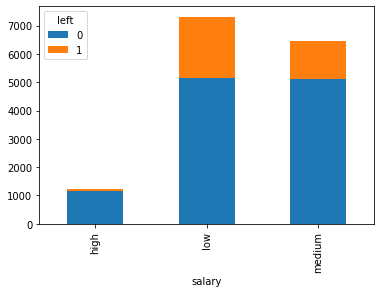

In [16]:
pd.crosstab(df['salary'],df['left']).plot.bar(stacked=True)

more the salary less likely to leave the company

less the salary more likely the person to leave the firm.


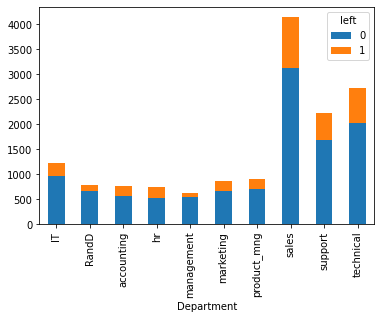

In [5]:
pd.crosstab(df['Department'],df['left']).plot.bar(stacked=True)   

SALES DEPARTMENT ARE MORE LIKELY TO LEAVE THE FIRM


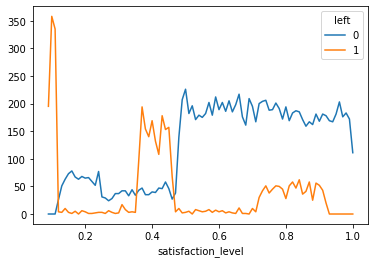

In [6]:
pd.crosstab(df['satisfaction_level'],df['left']).plot()

more the satisfaction more likely the employee will retained.

In [17]:
df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321




* mainly average_montly_hours,Work_accident,promotion_last_5years and satisfaction_level has the most impact on weather the person will stay or leave.
*   Rest columns can be ignored.








In [25]:
s=df.drop(['last_evaluation','number_project','time_spend_company','Department'],axis=1)

s

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,salary
0,0.38,157,0,1,0,low
1,0.80,262,0,1,0,medium
2,0.11,272,0,1,0,medium
3,0.72,223,0,1,0,low
4,0.37,159,0,1,0,low
...,...,...,...,...,...,...
14994,0.40,151,0,1,0,low
14995,0.37,160,0,1,0,low
14996,0.37,143,0,1,0,low
14997,0.11,280,0,1,0,low


In [27]:
dummy=s.join([pd.get_dummies(s.salary,prefix="salary")])
dummy

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,low,0,1,0
1,0.80,262,0,1,0,medium,0,0,1
2,0.11,272,0,1,0,medium,0,0,1
3,0.72,223,0,1,0,low,0,1,0
4,0.37,159,0,1,0,low,0,1,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,low,0,1,0
14995,0.37,160,0,1,0,low,0,1,0
14996,0.37,143,0,1,0,low,0,1,0
14997,0.11,280,0,1,0,low,0,1,0


In [35]:
dummy=dummy.drop(['salary'],axis=1)
dummy

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,0,1,0
1,0.80,262,0,1,0,0,0,1
2,0.11,272,0,1,0,0,0,1
3,0.72,223,0,1,0,0,1,0
4,0.37,159,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,0,1,0
14995,0.37,160,0,1,0,0,1,0
14996,0.37,143,0,1,0,0,1,0
14997,0.11,280,0,1,0,0,1,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(dummy,dummy.left,test_size=0.3)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
X_test

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
10031,0.82,160,0,0,0,0,1,0
13015,0.66,196,1,0,0,0,1,0
12808,0.79,236,0,0,0,0,0,1
8136,0.67,148,0,0,0,0,1,0
14772,0.37,131,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
4446,0.81,225,0,0,0,0,1,0
459,0.40,137,0,1,0,0,0,1
5343,0.74,275,0,0,0,0,1,0
45,0.84,182,0,1,0,0,1,0


In [38]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [41]:
model.score(X_test,y_test)

1.0